                         Count        Mean    Std Dev   Min    25%    50%  \
Extraversion_score        81.0   27.839506   5.482830  12.0   25.0   28.0   
Agreeableness_score       81.0   31.543210   4.438607  14.0   29.0   32.0   
Conscientiousness_score   81.0   31.148148   6.546203  13.0   27.0   32.0   
Neuroticism_score         81.0   24.790123   6.337815  13.0   21.0   24.0   
Openness_score            81.0   39.135802   5.349657  20.0   37.0   39.0   
CSI_Total_Score           81.0  118.185185  38.577231  18.0  104.0  127.0   

                           75%    Max  Skewness  Kurtosis  
Extraversion_score        32.0   38.0 -0.549504  0.152387  
Agreeableness_score       35.0   40.0 -0.760236  1.587195  
Conscientiousness_score   36.0   43.0 -0.626552  0.072241  
Neuroticism_score         30.0   39.0  0.162600 -0.717203  
Openness_score            43.0   48.0 -1.217358  2.158430  
CSI_Total_Score          149.0  161.0 -1.167203  0.487747  


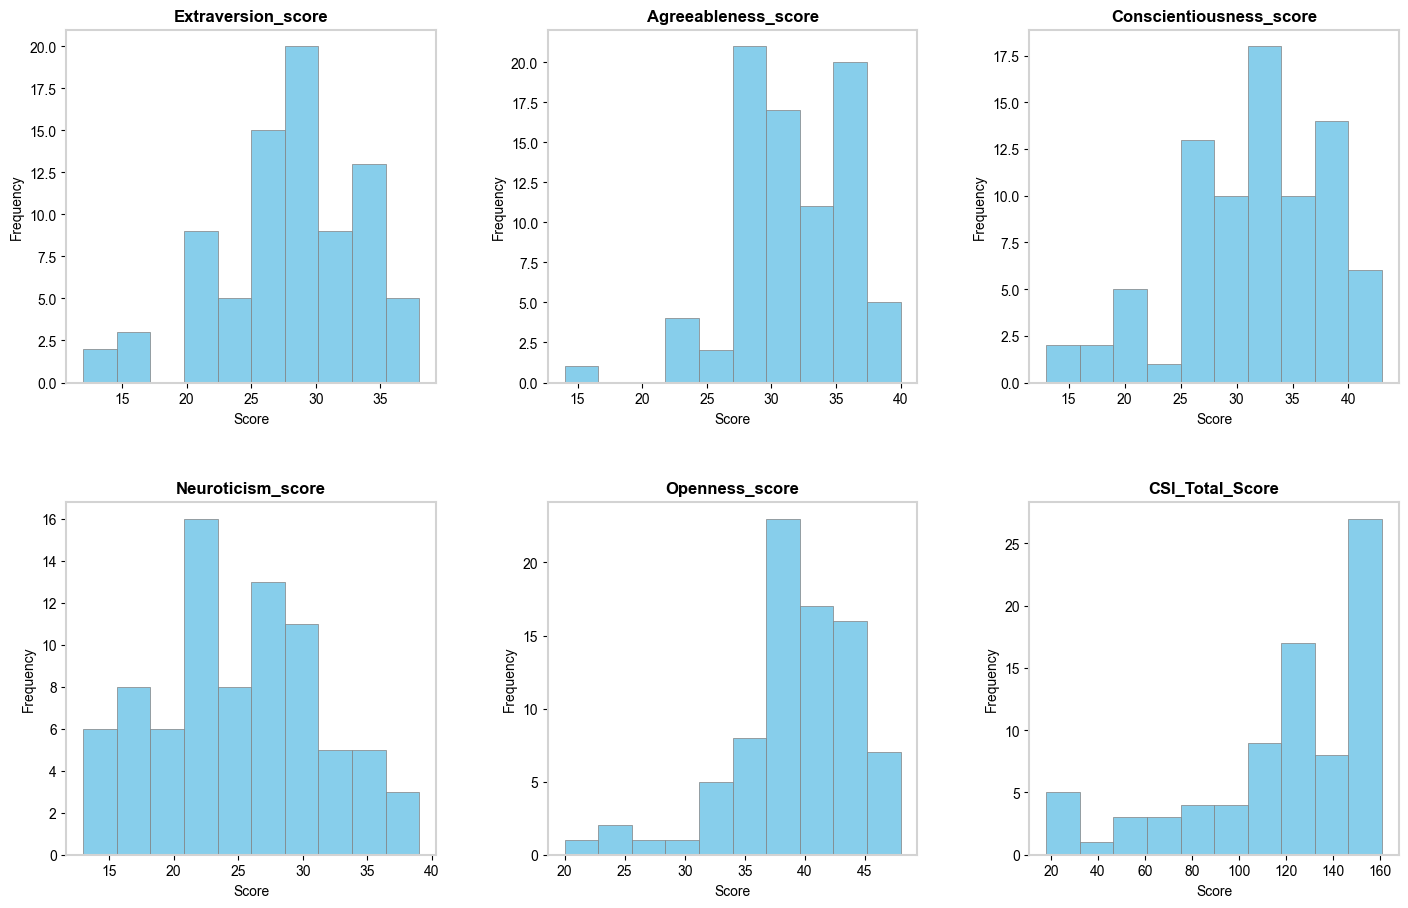

In [12]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis

# Load the scored dataset
file_path = "combined_score.xlsx"  # Replace with your file path
data = pd.read_excel(file_path)

# Display the first few rows to confirm loading
data.head()

# Columns to analyze
columns_of_interest = ['Extraversion_score','Agreeableness_score','Conscientiousness_score','Neuroticism_score','Openness_score','CSI_Total_Score']
data_subset = data[columns_of_interest]

# Summary statistics
summary_stats = data_subset.describe()

# Additional metrics
additional_stats = pd.DataFrame({
    'Skewness': data_subset.apply(skew),
    'Kurtosis': data_subset.apply(kurtosis)
})

# Combine both statistics
descriptive_stats = pd.concat([summary_stats.T, additional_stats], axis=1)

# Rename columns for clarity
descriptive_stats.columns = ['Count', 'Mean', 'Std Dev', 'Min', '25%', '50%', '75%', 'Max', 'Skewness', 'Kurtosis']

descriptive_stats.to_excel('descriptive_statistics_output.xlsx', sheet_name='Descriptive Statistics')

# Display the descriptive statistics
print(descriptive_stats)
import matplotlib.pyplot as plt

# Define the columns to create histograms
columns_of_interest = ['Extraversion_score', 'Agreeableness_score', 
                       'Conscientiousness_score', 'Neuroticism_score', 
                       'Openness_score', 'CSI_Total_Score']

# Set the overall figure size and layout
plt.rcParams['font.family'] = 'Arial'
plt.figure(figsize=(15, 10))

# Loop through each column and create a subplot
for i, column in enumerate(columns_of_interest, 1):
    ax = plt.subplot(2, 3, i)  # Create a grid of 2 rows and 3 columns
    plt.hist(data[column], bins=10, color='skyblue', edgecolor='gray',linewidth=0.5)
    plt.title( column, fontsize=12, fontweight='bold')
    plt.xlabel('Score', fontsize=10)
    plt.ylabel('Frequency', fontsize=10)


    
    for spine in ax.spines.values():
        spine.set_edgecolor('#D3D3D3')  # Light gray border
        spine.set_linewidth(1.5) 

plt.tight_layout(pad = 4)
plt.savefig('descriptive_histograms.png', format='png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

Age_Group
26-35    63
18-25    14
36-45     3
Name: count, dtype: int64


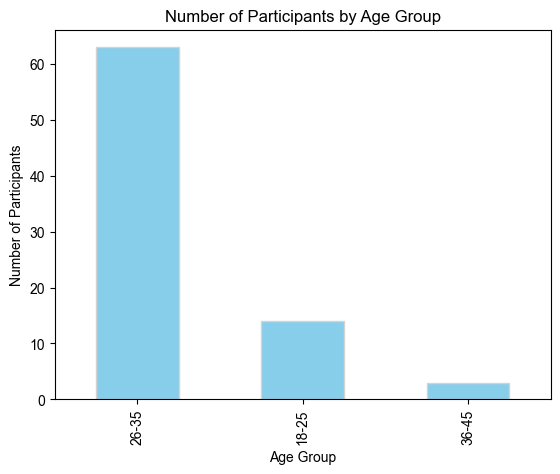

In [22]:
import pandas as pd


file_path = 'responses.xlsx'

# Read the file
data = pd.read_excel(file_path)

# Define the age bins (adjust as necessary)
bins = [18, 25, 35, 45]  # Age groups
labels = ['18-25', '26-35', '36-45']  # Labels for the age groups

# Create a new column 'Age_Group' by categorizing the 'Age' column
data['Age_Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# Count the number of participants in each age group
age_group_counts = data['Age_Group'].value_counts()

# Display the counts for each age group
print(age_group_counts)
import matplotlib.pyplot as plt

# Plot the age group distribution
age_group_counts.plot(kind='bar', color='skyblue', edgecolor='#D3D3D3')

# Add titles and labels
plt.title('Number of Participants by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Participants')

# Show the plot
plt.show()

In [5]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
file_path = "combined_score.xlsx"
# Assuming these are the independent variables
independent_vars = ['Extraversion_score','Agreeableness_score','Conscientiousness_score','Neuroticism_score','Openness_score','CSI_Total_Score']

# Subset the data
X = data[independent_vars]

# Add a constant for the VIF calculation
X_with_constant = sm.add_constant(X)
vif_data = pd.DataFrame()
vif_data['Variable'] = X_with_constant.columns
vif_data['VIF'] = [variance_inflation_factor(X_with_constant.values, i) for i in range(X_with_constant.shape[1])]

# Display the results
print(vif_data)

                  Variable         VIF
0                    const  172.922427
1       Extraversion_score    1.302201
2      Agreeableness_score    1.237700
3  Conscientiousness_score    1.394412
4        Neuroticism_score    1.412306
5           Openness_score    1.331909
6          CSI_Total_Score    1.373944
